In [10]:
import torch
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
%config InlineBackend.figure_format='retina'

In [2]:
a = torch.FloatTensor(1, 14).normal_(0, 1)

In [3]:
matplotlib.style.use('seaborn-pastel')

In [4]:
a.requires_grad = True

In [5]:
def plot_1d_row(tensor, background='w', name='test.pdf'):
    fig, ax = plt.subplots(figsize=(5, 1), dpi=144)

    # Hide axes
    ax.set_axis_off()
    
    rows = [[f'{x:.2f}' for x in row] for row in tensor]
    n_cols = len(tensor[0])
    n_rows = len(tensor)
    colors = [[row] * n_cols for row in background]
    table = matplotlib.table.table(ax, cellColours=colors, cellText=rows, colLabels=None, loc='center', colWidths=[0.15]*n_cols)
    for cell in table.get_children():
        cell.set_height(0.75)
        cell._loc = 'center'
    plt.show()
    fig.savefig(name)

In [6]:
layer = torch.nn.Conv1d(1,1,3)

In [7]:
layer.weight

Parameter containing:
tensor([[[ 0.2198, -0.0508, -0.3705]]], requires_grad=True)

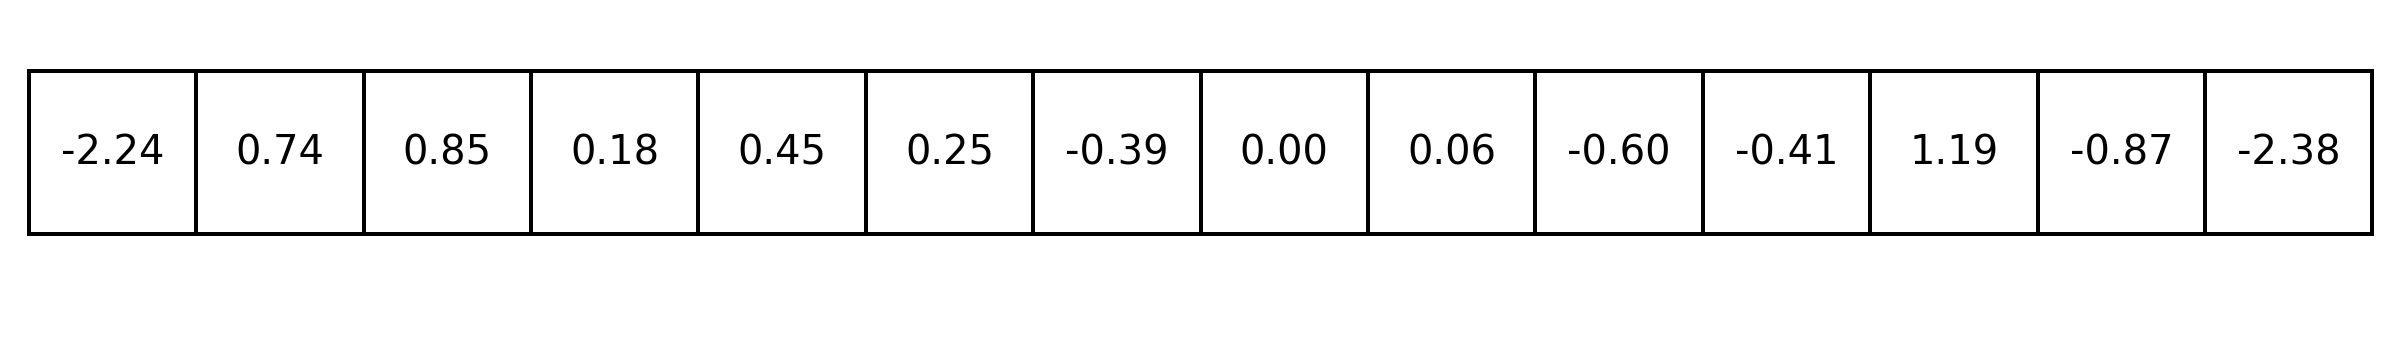

In [8]:
plot_1d_row(a, name='original_tensor.pdf')

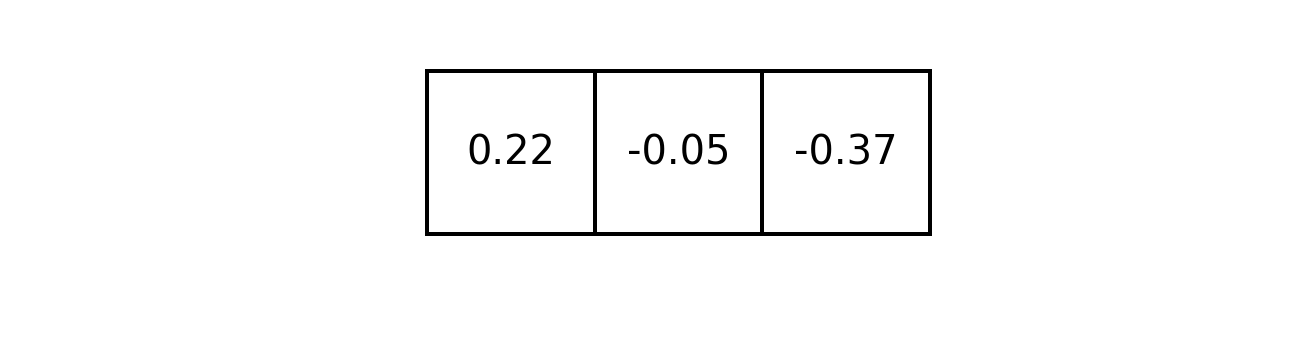

In [9]:
plot_1d_row(layer.weight[0])

In [10]:
b = layer(a[None])[0]
b_grad = torch.FloatTensor(1, b.shape[1]).normal_(0, 1)
b.backward(gradient=b_grad)

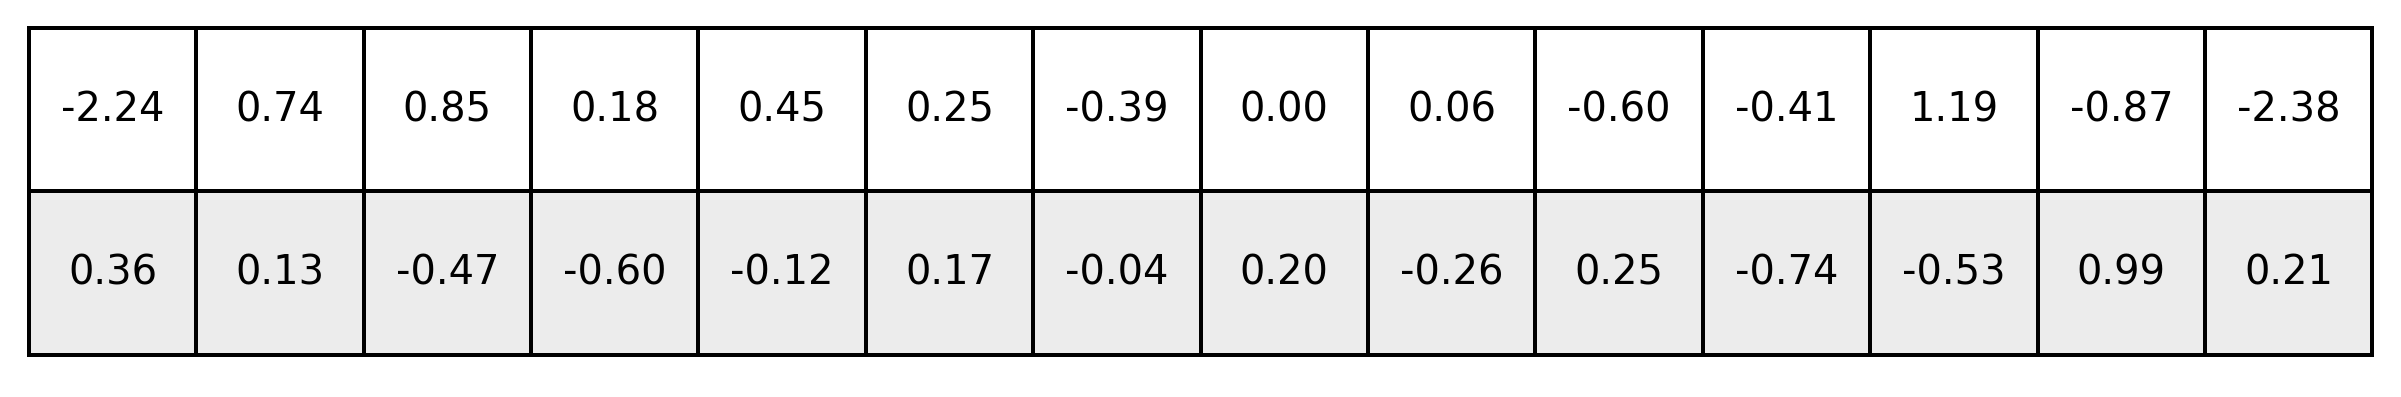

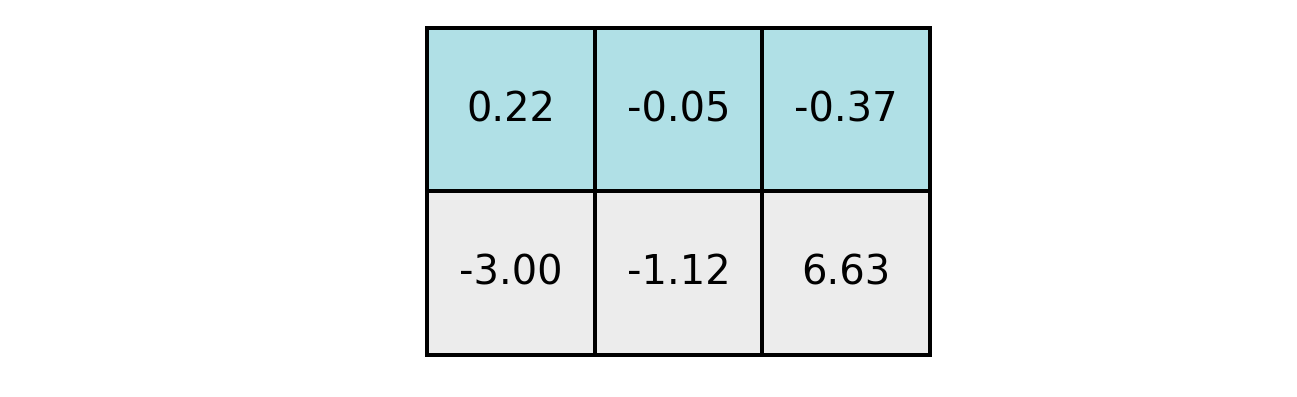

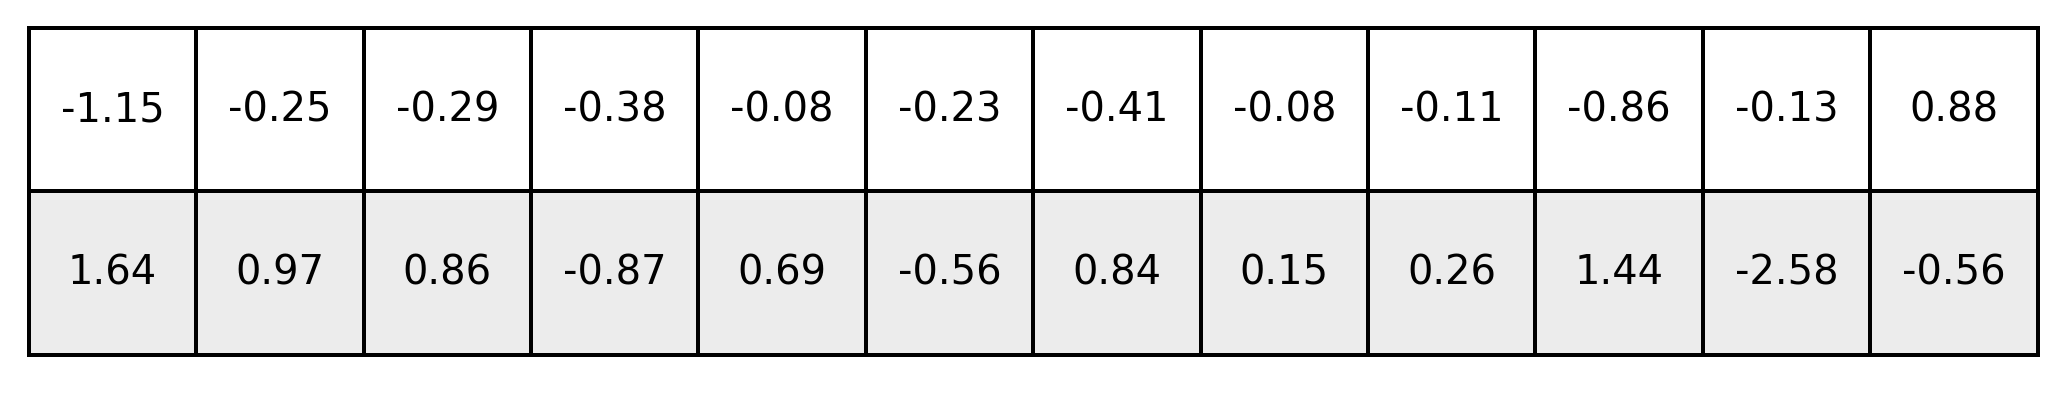

In [11]:
plot_1d_row(torch.cat((a, a.grad)), background=['w', '20'], name='full_tensor.pdf')
plot_1d_row(torch.cat((layer.weight[0], layer.weight.grad[0])), background=['C5', '20'], name='weights.pdf')
plot_1d_row(torch.cat((b, b_grad)), background=['w', '20'], name='full_results.pdf')

In [12]:
layer.weight.grad.fill_(0)

tensor([[[0., 0., 0.]]])

In [13]:
def plot_tile(tile, grad, start=0, end=6, tile_name='a'):
    tile1 = tile.clone().detach().requires_grad_(True)
    tile1_b = layer(tile1[None])[0]
    tile1_b.backward(gradient=grad)

    plot_1d_row(torch.cat((tile1, tile1.grad)), background=['w', '20'], name=tile_name + '_tensor.pdf')
    plot_1d_row(torch.cat((layer.weight[0], layer.weight.grad[0])), background=['C5', '20'], name=tile_name + '_weights.pdf')
    plot_1d_row(torch.cat((tile1_b, grad)), background=['w', '20'], name=tile_name + '_results.pdf')

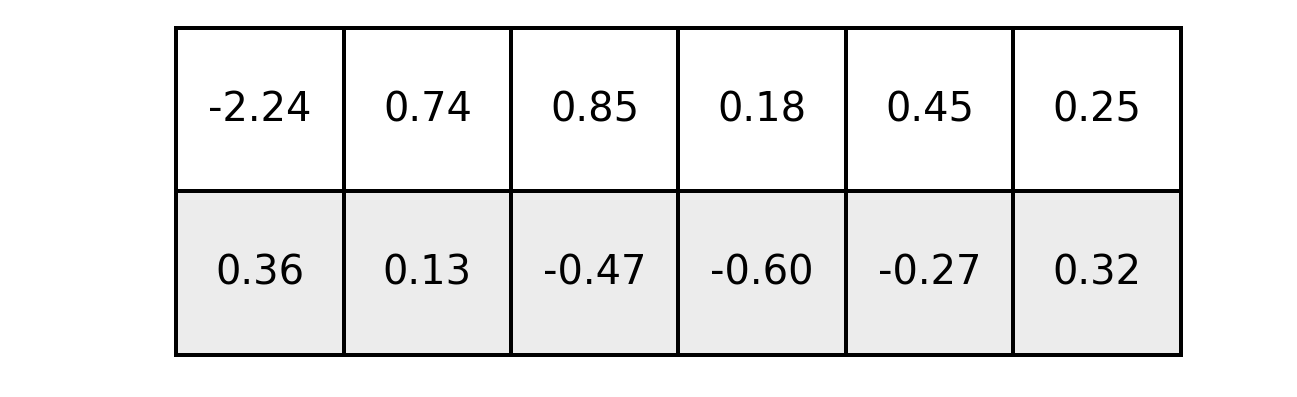

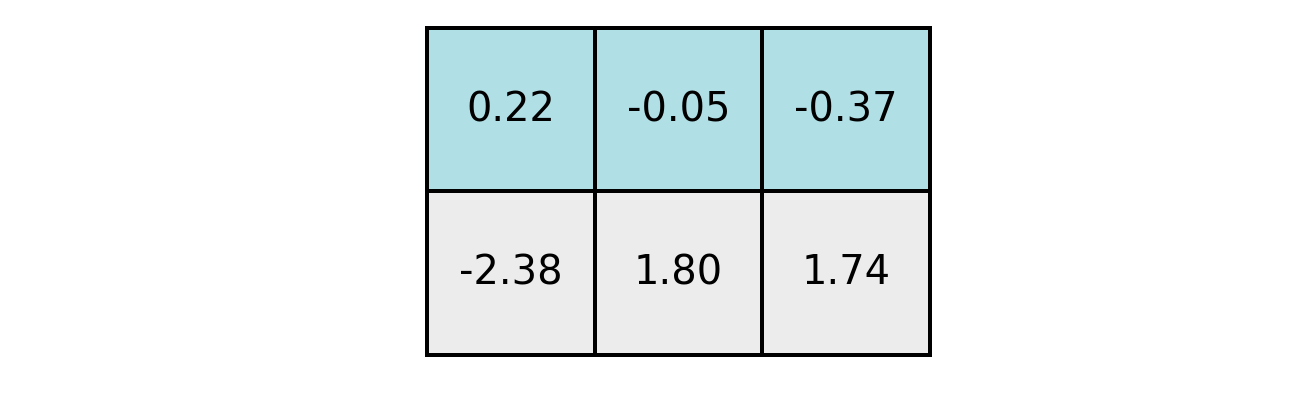

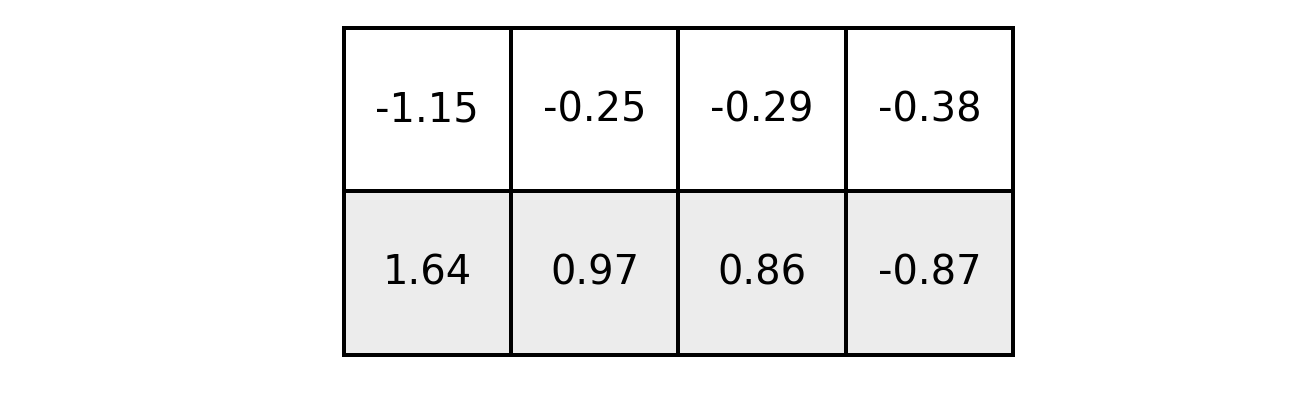

In [14]:
plot_tile(a[:, 0:6], b_grad[:,0:4], tile_name='a')

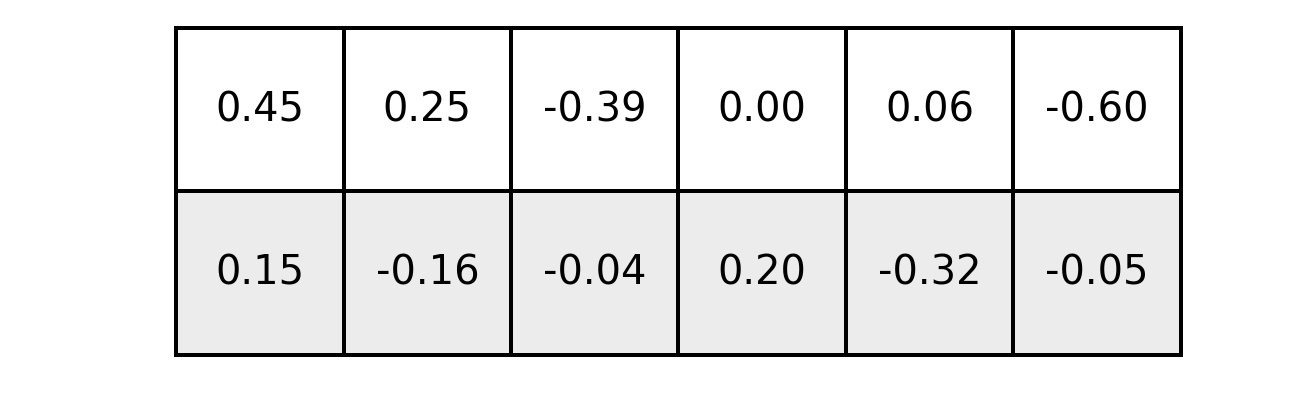

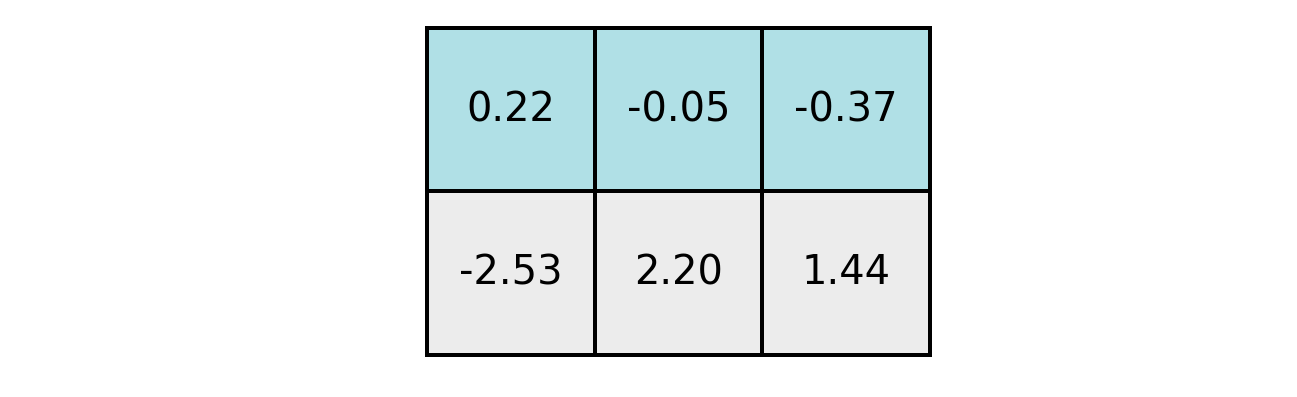

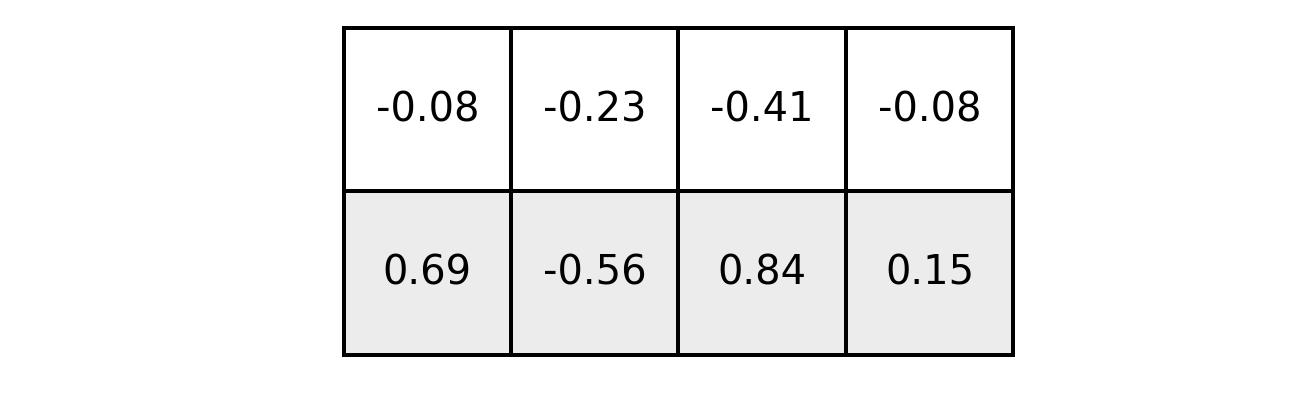

In [15]:
plot_tile(a[:, 4:10], b_grad[:,4:8], tile_name='b')

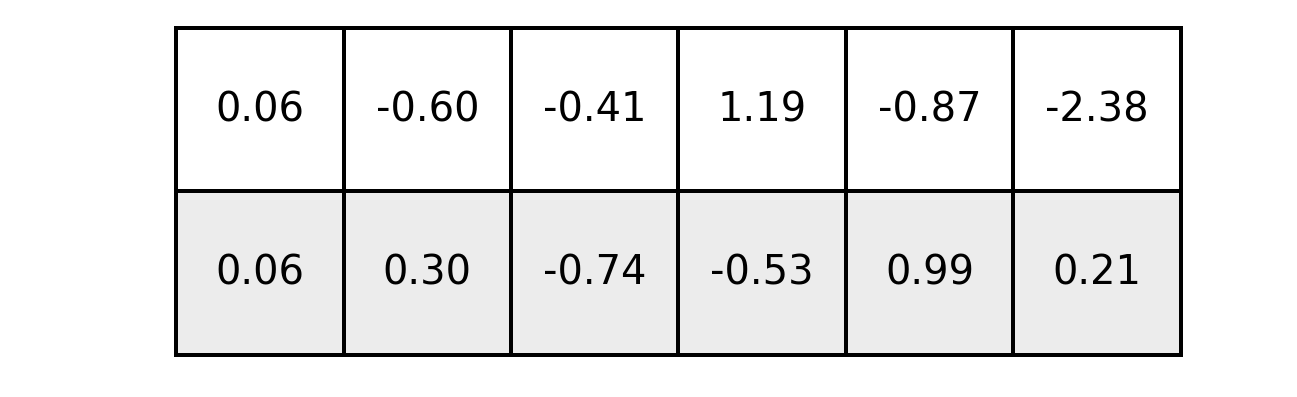

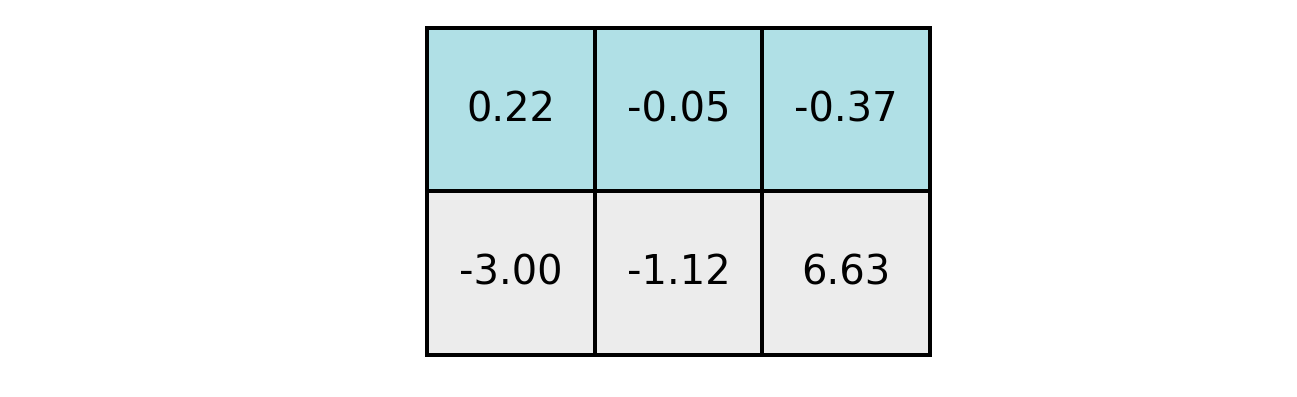

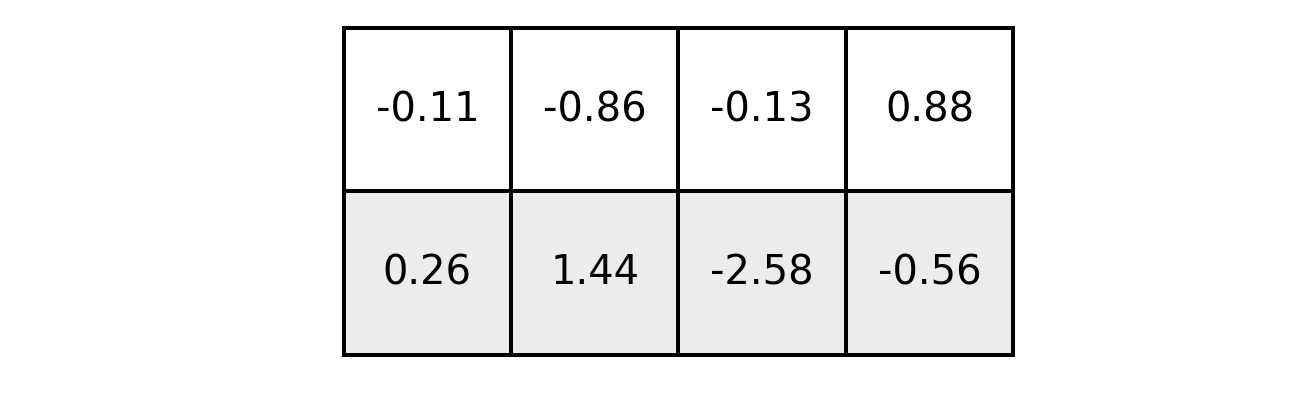

In [16]:
plot_tile(a[:, 8:], b_grad[:,8:], tile_name='c')

----